<a href="https://colab.research.google.com/github/gulmert89/dsBootcamp/blob/master/odev93_evaluating_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 9.3 - Kümeleme Algoritmaları: Performans Ölçümü
## Ödev:
1) İki küme k-ortalama çözümünün siluet katsayısını elde edin. Siluet katsayısının, küme sayısının üç olduğu yukarıdakilerden büyük olacağını göreceksiniz. Iris veri setinin üç farklı kümeden oluştuğunu biliyoruz. Kümelerin sayısının doğru sınıf sayısına eşit olmasıyla çözümün siluet puanının, küme sayısının doğru sınıf sayısından farklı olduğu seviyeden daha düşük olduğunu nasıl açıklarsınız?


2) Bu ödevde, UC Irvine Machine Learning Repository'de bulunan kalp hastalığı veri setiyle çalışacaksınız.

Veri setini kullanmadan önce bazı ön işlemler yapmanız gerekiyor:

<code># Define the features and the outcome<br>
X = heartdisease_df.iloc[:, :13]<br>
y = heartdisease_df.iloc[:, 13]<br></code>

<code># Replace missing values (marked by ?) with a 0<br>
X = X.replace(to_replace='?', value=0)<br></code>

<code># Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis<br>
y = np.where(y > 0, 0, 1)<br></code>

Burada, X sizin özellikleriniz olacak ve y içinde etiketleri tutuyoruz. Y, 1'e eşitse, o zaman buna karşılık gelen hastanın kalp hastalığı olduğunu ve y'nin 0'a eşit olması durumunda, hastanın kalp hastalığı olmadığı anlaşılacaktır.

* Verileri rastgele ikiye bölün ve bu bölümdeki tutarlılık tartışmamızda yaptığımız gibi, küme sayısı olarak iki, üç ve dört kullanarak k-ortalama uygulayın. Görselleştirmeyi kullanarak çözümlerin tutarlılığını değerlendirin. Hangisi en iyisi gibi görünüyor?
* K veri setini tüm veri kümelerine k, iki, üç ve dört eşit olacak şekilde uygulayın ve her biri için ARI puanı alın. Hangi model en iyisidir?
* K veri setini tüm veri kümelerine k, iki, üç ve dört eşit olacak şekilde uygulayın ve her biri için siluet katsayısı elde edin. Hangi model en iyisidir?

---
---
---
## Soru 1

In [1]:
# mounting the Google Drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("darkgrid")
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import datasets, metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# preprocessing
iris = datasets.load_iris()
x1 = iris.data
y1 = iris.target

scaler = StandardScaler()
x1_std = scaler.fit_transform(x1)

In [4]:
def kmeans_silhouette(n, variable):
    # forming KMeans model with 'n' clusters
    kmeans_cluster = KMeans(n_clusters=n, random_state=42)
    # fit the model
    kmeans_cluster.fit(variable)
    prediction = kmeans_cluster.predict(variable)
    # silhouette score
    silhouette = metrics.silhouette_score(X=variable, 
                                          labels=prediction, 
                                          metric="euclidean")    
    return silhouette

In [5]:
# silhouette score of the model with various clusters
silhouette_scores1 = []
for i in range(2,10):
    silhouette_score = kmeans_silhouette(i, x1_std)
    silhouette_scores1.append(silhouette_score)
    print("Silhouette score of the model with {0} clusters: {1:.3f}".\
    format(i, silhouette_score))

Silhouette score of the model with 2 clusters: 0.582
Silhouette score of the model with 3 clusters: 0.460
Silhouette score of the model with 4 clusters: 0.419
Silhouette score of the model with 5 clusters: 0.346
Silhouette score of the model with 6 clusters: 0.326
Silhouette score of the model with 7 clusters: 0.327
Silhouette score of the model with 8 clusters: 0.332
Silhouette score of the model with 9 clusters: 0.354


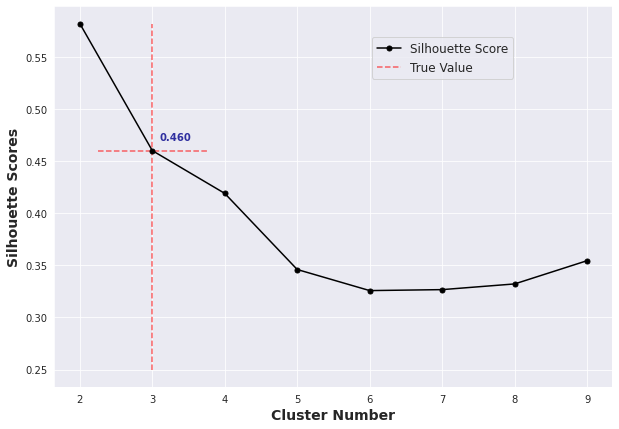

In [6]:
plt.figure(figsize=(10,7))
# plot
plt.plot(list(range(2,10)), silhouette_scores1, 
         label="Silhouette Score", 
         color="black", 
         marker=".", markersize=10)
# vertical line
plt.vlines(x=3, ymin=0.25, ymax=max(silhouette_scores1), 
           colors="red", 
           linestyles="dashed", 
           label="True Value", 
           alpha=0.6)
# horizontal line
plt.hlines(y=silhouette_scores1[1], xmin=2.25, xmax=3.75, 
           colors="red", 
           linestyles="dashed", 
           alpha=0.6)
# text for the true cluster number
plt.text(x=3.1, y=(silhouette_scores1[1]+0.01), 
         s=f"{silhouette_scores1[1]:.3f}", 
         color="darkblue",
         weight="bold", 
         alpha=0.8)

plt.xlabel("Cluster Number", size=14, weight="bold")
plt.ylabel("Silhouette Scores", size=14, weight="bold")
plt.legend(fontsize="large", 
           frameon=True, 
           framealpha=0.8, 
           loc=(0.569, 0.81))
plt.show()

### Yorum:
Silüet puanı en yüksek olan küme sayısı 2'dir. Her ne kadar gerçek küme sayısı 3 olsa da, dersteki görselden de görebileceğimiz üzere, model ilk bakışta 2 kümeymiş gibi gözükmektedir. Dolayısıyla k=2 puanı, gerçek değer olan 3'ten büyüktür ve model de bu şekilde düşünmektedir.

---
---
---
## Soru 2

In [7]:
columns = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg", 
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
path = "/content/drive/My Drive/MertColab/odevler/Cleveland.data"
heart_disease = pd.read_csv(path, sep=",", names=columns)
del columns, path

In [8]:
heart_disease.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [9]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  num      303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [10]:
# preprocess
x2 = heart_disease.iloc[:, :13]
y2 = heart_disease.iloc[:, 13]

x2 = x2.replace(to_replace="?", value=0)
x2 = x2.astype("float64")
y2 = np.where(y2>0, 1, 0)

x2_std = scaler.fit_transform(x2)

pca_model = PCA(n_components=2)
x2_pca = pca_model.fit_transform(x2_std)

In [11]:
print("Variance Ratios: {}".format(pca_model.explained_variance_ratio_))

Variance Ratios: [0.23630818 0.12281689]


In [12]:
# divide the dataset into two
x2_std_half1, x2_std_half2, \
x2_pca_half1, x2_pca_half2 = train_test_split(x2_std, x2_pca, 
                                              test_size=0.5, random_state=42)

In [13]:
def kmeans_predictor(cluster_number, variable):
    kmeans_cluster = KMeans(n_clusters=cluster_number, random_state=42)
    # fit the model
    kmeans_cluster.fit(variable)
    # make the prediction
    prediction = kmeans_cluster.predict(variable)
    return prediction

In [14]:
prediction_df = pd.DataFrame()

# sample half 1
x2_pca_half1_feature0 = x2_pca_half1[:, 0]
x2_pca_half1_feature1 = x2_pca_half1[:, 1]

# sample half 2
x2_pca_half2_feature0 = x2_pca_half2[:-1, 0]
x2_pca_half2_feature1 = x2_pca_half2[:-1, 1]
# we needed to eliminate the shape inconsistency because
# 50/50 split caused inequal shapes (151 vs 152 rows)

# kmeans predictions through 2-4 clusters
for i in range(2, 5):
    name1 = "cluster"+str(i)+"_sample1"
    name2 = "cluster"+str(i)+"_sample2"
    prediction_df[name1] = kmeans_predictor(i, x2_std_half1)
    prediction_df[name2] = kmeans_predictor(i, x2_std_half2[:-1, :])

In [15]:
# let us see the column names
prediction_df.columns

Index(['cluster2_sample1', 'cluster2_sample2', 'cluster3_sample1',
       'cluster3_sample2', 'cluster4_sample1', 'cluster4_sample2'],
      dtype='object')

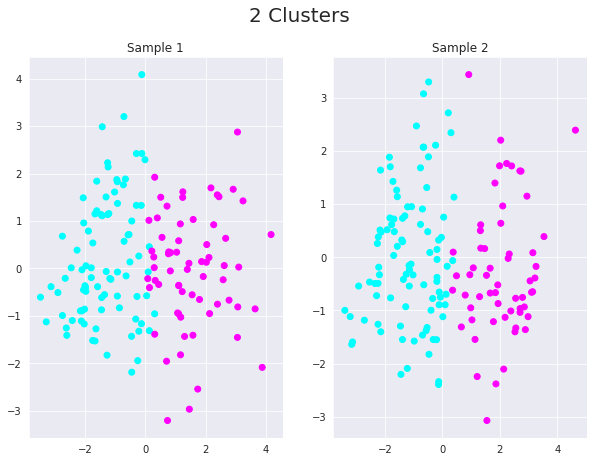

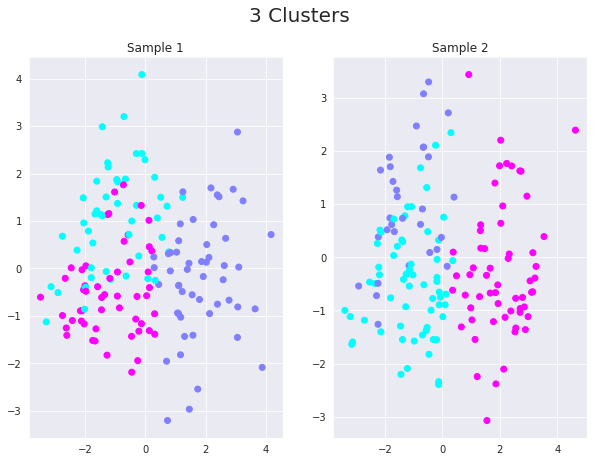

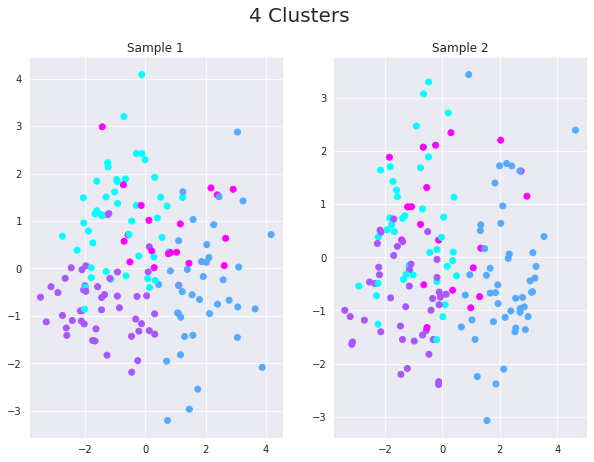

In [16]:
for j in range(2,5):
    fig, axs = plt.subplots(1,2, figsize=(10,7))
    for i, X in enumerate([(x2_pca_half1_feature0, x2_pca_half1_feature1),
                        (x2_pca_half2_feature0, x2_pca_half2_feature1)]):
        
        x_axis = X[0]
        y_axis = X[1]
        c = prediction_df["cluster"+str(j)+"_sample"+str(i+1)]
        axs[i].scatter(x_axis, y_axis, c=c, cmap="cool")
        axs[i].set_title("Sample "+str(i+1))
    plt.suptitle(f"{j} Clusters", fontsize=20)
    plt.show()
    print("\n")

In [17]:
# silhouette & adjusted rand score of the model with various clusters
silhouette_scores2 = []
adjusted_rand_index2 = []
for i in range(2,10):
    silhouette_scores2.append(kmeans_silhouette(i, x2_std))
    ari_value = metrics.adjusted_rand_score(y2, kmeans_predictor(i, x2_std))
    adjusted_rand_index2.append(ari_value)
    if i>4:
        pass
    else:
        print("Silhouette score with {0} clusters: {1:.3f}".\
              format(i, kmeans_silhouette(i, x2_std)))
        print("Adjusted Rand Index with {0} clusters: {1:.3f}".\
              format(i, ari_value),"\n")

Silhouette score with 2 clusters: 0.175
Adjusted Rand Index with 2 clusters: 0.438 

Silhouette score with 3 clusters: 0.130
Adjusted Rand Index with 3 clusters: 0.279 

Silhouette score with 4 clusters: 0.133
Adjusted Rand Index with 4 clusters: 0.185 



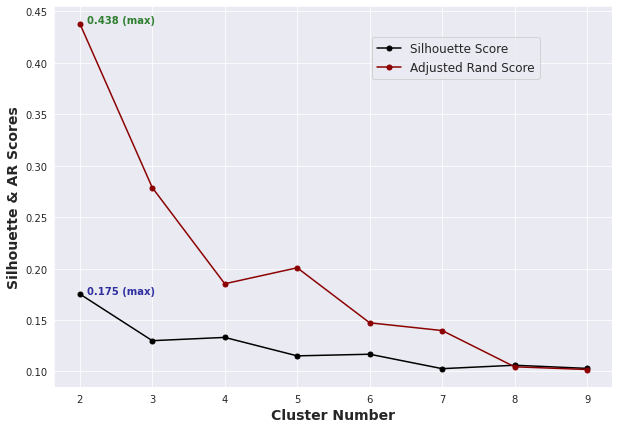

In [18]:
plt.figure(figsize=(10,7))

# silhouette plot
plt.plot(list(range(2,10)), silhouette_scores2, label="Silhouette Score", 
         color="black", 
         marker=".", markersize=10)
# text for the 2 clusters model
plt.text(x=2.1, y=(silhouette_scores2[0]),
         s=f"{silhouette_scores2[0]:.3f} (max)",
         color="darkblue",
         weight="bold",
         alpha=0.8)

# adjusted rand plot
plt.plot(list(range(2,10)), adjusted_rand_index2, label="Adjusted Rand Score",
         color="darkred", 
         marker=".", markersize=10)
# text for the 2 clusters model
plt.text(x=2.1, y=(adjusted_rand_index2[0]),
         s=f"{adjusted_rand_index2[0]:.3f} (max)",
         color="darkgreen",
         weight="bold",
         alpha=0.8)

plt.xlabel("Cluster Number", size=14, weight="bold")
plt.ylabel("Silhouette & AR Scores", size=14, weight="bold")
plt.legend(fontsize="large", frameon=True, framealpha=0.8, loc=(0.569, 0.81))
plt.show()

### Yorumlar:
Silüet puanı ve Adjusted Rand indeksi, küme sayısının 2 olduğu modelde en yüksek değerdedir. Her ne kadar *scatter* grafiğindeki görsellerden keskin bir anlam çıkaramasak da *(en azından Sample 2, Sample 1'den daha anlaşılır durmaktadır)*, küme sayısının en uygun değerinin 2 olduğunu söyleyebiliriz.